# Integrales

In [ ]:
# Para imprimir todas las líneas
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
# Solo la última
InteractiveShell.ast_node_interactivity = "last_expr"

Importación de las librerías necesarias

In [ ]:
import numpy as np
import pylab as plt
from sympy import * # Librería de Calculo
from sympy.plotting import plot as symplot # Librería para las gráficas
from sympy.abc import x, y, h # Carga de un simbolico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para las gráficas

## Definición de área bajo una curva

Dada la gráfica de una función, se puede definir la integral definida como el área bajo la función entre dos valores $a$ y $b$.


Así por ejemplo para la función
$cos(2πx)e^{-x}+1$ entre los valores $1$ y $4$ se puede representar como 


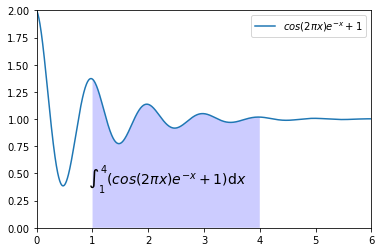

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

a=0
b=6
n=1000
x = np.linspace(a,b,n)
y = np.cos(2*np.pi*x)*np.exp(-x)+1

plt.axis([np.min(x),np.max(x),0,np.max(y)])           # Rango de coordenadas
plt.plot(x,y,label="$cos(2πx)e^{-x}+1$")      	  # Dibujar curva con icono
plt.fill_between(x,y1=y,y2=0,where=(x>=1)&(x<=4),   # Rellene el área de integración
                 facecolor='blue',alpha=0.2)
plt.text(0.5*(0.7+4),0.4,r"$\int_{1}^4(cos(2πx)e^{-x}+1)\mathrm{d}x$",
         horizontalalignment='center',fontsize=14)    # Añadir texto explicativo
plt.legend()                                          #Muestra el icono
plt.show()

Una forma de calcular una aproximación del área bajo una curva sería mediante una suma finita. De esta forma, se define la Suma de Riemann como una  aproximación del valor de una integral mediante una suma finita.

La suma se calcula dividiendo la región en formas (rectángulos, trapezoides, cuadrados, polinomios cuadráticos o cúbicos, etc.) que si las juntamos todas se forma un zona similar a la región que se está midiendo. Después, calculando el área para cada una de estas formas y sumandolas todas, se puede encontrar una aproximación numérica para una integral definida.  

Hay que tener en cuenta que la región rellenada por las formas pequeñas generalmente no es exactamente la misma forma que la región que se está midiendo, con lo que la suma de Riemann será una aproximación diferente del área que se está midiendo. El error que se comete, se puede reducir utilizando formas cada vez más pequeñas. Así, a medida que las formas se hacen cada vez más pequeñas, la suma se acerca a la integral buscada.

Una de las formas más simples es el rectángulo. Así pues, vamos a aproximar el área bajo la curva mediante una suma de áreas de rectángulos para ello, primeramente, vamos a realizar una partición del intervalo $[a, b]$ en $n$ particiones de longitud $\Delta x$.

Para calcular la altura de los rectángulos vamos a elegir dos valores el valor de la función en el punto inicial izquierdo y el valor en el punto final derecho de cada elemento de la partición. Estas sumas de las áreas de esos rectángulos se denominarán suma izquierda en un caso y suma derecha en el otro.

Asi pues, tomando cada intervalo de igual longitud $\Delta x = \frac{(b-a)}{n}$, con $n$ número de intervalos definidos mediante la partición $\{a=x_1, x_2, \ldots,x_n,x_{n+1}=b\}$, y tomando como alturas de los rectángulos los valores de $f(x_{i})$ y $f(x_{i+1})$ respectivamente se obtienen las áreas de los rectángulos.

Ahora solo queda sumar las áreas de los rectángulos para obtener una aproximación, así la Suma Izquierda será

$$L_n = \sum_{i=1}^n \Delta x f(x_{i}) = \Delta x  \sum_{i=1}^n f(x_{i}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i}),$$

y la Suma Derecha

$$R_n = \sum_{i=1}^n \Delta x f(x_{i+1}) = \Delta x  \sum_{i=1}^n f(x_{i+1}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i+1}) $$

Esto se puede implementar en python de la forma siguiente


In [ ]:
# function: función a integrar de la forma "lambda x: f(x)"
# a: límite inferior de integración
# b: límite superior de integración
# n: tamaño de cada elemento de la partición entre a y b

def L_n(function, a, b, n):
    s = np.arange(a, b, n)
    f = []
    for i in s:
        f.append(function(i))
    array_integral = map(lambda x: x * n, f)
    sum = 0
    for i in array_integral:
        sum += i
    return sum

def R_n(function, a, b, n):
    s = np.arange(a + n, b + n, n)
    f = []
    for i in s:
        f.append(function(i))
    array_integral = map(lambda x: x * n, f)
    sum = 0
    for i in array_integral:
        sum += i
    return sum

# el verdadero valor de la integral estará cerca de la media de estas dos sumas
def Riemann_sum(function, a, b, n):
     Ln = L_n(function, a, b, n) 
     Rn = R_n(function, a, b, n)
     result = (Ln, Rn)
     return result

## ejemplo 
n=100
a =0
b =np.pi
h = (float(b)-float(a))/float(n)
Int = Riemann_sum(lambda x: np.sin(x)**2 * x**2 * 10**-x, a, b, h)

print("La Suma Izquierda de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es", Int[0])
print("La Suma Derecha   de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es", Int[1])

La Suma Izquierda de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es 0.09994382377037576
La Suma Derecha   de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es 0.09994382377037579


También podemos usar la regla trapezoidal que consiste en aproximar la altura de la función a una constante en cada subintervalo $[a,b]$ como si fuera un polinomio lineal.  En este caso, la región bajo el polinomio lineal es un  trapezoide. 

En cada sub-intervalo $x_{i}$ y $x_{i+1}$, el trapezoide tiene de área
$$\frac{f(x_{i})+ f(x_{i+1})}{2}\Delta x $$

Y sumando estas áreas en todos los sub-intervalos obtenemos:

$$\int_a^b f(x)dx = \sum_{i=1}^n \frac{f(x_i)+f(x_{i+1})}{2}\Delta x $$

$$=  \frac{(a + b)}{2} + \sum_{i=1}^{n-1}  f(x_{i+1})\Delta x$$

Esto se puede implementar fácilemnet en python mediante el siguiente código


In [ ]:
import numpy as np

def suma_trapezoidal(function ,a ,b ,n):
    h     = (float(b)-float(a))/float(n)
    xvals = [a + i*h for i in range(1, n)]    
    function = np.vectorize(function) 
    yvals = function(xvals)
    return (sum(yvals) + 0.5*(function(a) + function(b)))*h

n=100
a =0
b =np.pi
STn = suma_trapezoidal(lambda x: np.sin(x)**2 * x**2 * 10**-x, a, b, n)
print("La Suma Trapezoidal de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es", STn)


La Suma Trapezoidal de:  sin(x)^2 * x^2 * 10^(-x) de 0 a pi es 0.09994382377037576


## Cálculo de integrales en Python

Para calcular integrales definidas, la librería *scipy* proporciona un comando de calculo inmediato *quad*. Este comando devuelve una tupla cuyo primer elemento es el valor de la integral y tiene la sintaxis siguiente
*quad(función, a, b)*

In [ ]:
from scipy.integrate import quad
def integrand1(x):
    return x**2 + x + 1

def integrand2(x, a, b):
    return m*x**2 + n

a=0
b=3

J = quad(integrand1, a, b) 
print("la integral de x^2 + x +1 entre a = ",a, " y b = ", b, "mediante el comando quad es ",J[0], " con un error de ", J[1])

m = 2
n = 1
I = quad(integrand2, a, b, args=(a,b))
print("la integral de m*x + n, con m = ", m, "y n = ",n, "entre a = ",a, " y b = ", b, "utilizando el comando quad es ",I[0], " con un error de ", I[1])



la integral de x^2 + x +1 entre a =  0  y b =  3 mediante el comando quad es  16.5  con un error de  1.8318679906315083e-13
la integral de m*x + n, con m =  2 y n =  1 entre a =  0  y b =  3 utilizando el comando quad es  21.0  con un error de  2.3314683517128287e-13


Con Python, se pueden resolver integrales indefinidas de forma simbólica con la ayuda de la librería *SymPy*. Para ello, vamos a utilizar el objeto *integrate* cuya sintaxis es la siguiente: *integrate(funcion, variable)*.

In [ ]:
from sympy import integrate, Symbol

x = Symbol('x') # Creando el simbolo x.
fx = x**3 - 6*x

dx2=integrate(fx, x)
dx2


x**4/4 - 3*x**2

La función *Integral* da el mismo resultado

In [ ]:


from sympy import Integral, Symbol

x = Symbol('x') # Creando el simbolo x.
fx = x**3 - 6*x
dx1 = Integral(fx, x).doit()
dx1

x**4/4 - 3*x**2

En *SymPy*, también se pueden calcular integrales definidas mediante las funciones *integrate* o *Integral*, considerando el hecho que deben añadirese los límites de integración:

In [ ]:
from sympy import integrate, Symbol

x = Symbol('x') # Creando el simbolo x.
fx = x**3 - 6*x

Id2 = integrate(fx, (x,0,3))
Id2

-27/4

Otra forma de definir variables simbólicas es utilizar el módulo *abc* para importarlas directamente (en nuestro caso *x*) y después utilizar *integrate* para calcular la integral. Se puede guardar la función a integrar en una variable o bien pasarla directamente como argumento:

In [ ]:
import numpy as np

from sympy import integrate
from sympy.abc import x

f = x**2 - 3*x + 2
integrate(f)


 3      2      
x    3⋅x       
── - ──── + 2⋅x
3     2        

En este caso no hemos tenido incovenientes, porque en la expresión a integrar sólo existe una variable simbólica, pero si la expresión tuviese más de una, habría que especificar de manera explícita la variable respecto a la cual se integra, de lo contrario Python nos mostrará un error.

In [ ]:
from sympy.abc import a,b,c
from sympy import integrate

f = a*x**2+b*x+c
integrate(f,x)

   3      2      
a⋅x    b⋅x       
──── + ──── + c⋅x
 3      2        

En SymPy, también se pueden calcular calcular una integral definida se utiliza la función integrate, considerando el hecho que deben añadirse los límites de integración mediante la sintaxis:

In [ ]:
from sympy import cos,pi
from sympy import integrate, init_printing
from sympy.abc import x
init_printing(use_latex="mathjax")

f = x**2 - 3*x + 2
ID = integrate(f)
ID

# o integrales definidas
Res1 = integrate(cos(x), (x,0,pi/2.0))
print("la integral definida de cos(x) entre 0 y pi/2 es: ", Res1)

Res2 = integrate(x, (x,0,5))
print("la integral definida de x entre 0 y 5 es: ", Res2)

la integral definida de cos(x) entre 0 y pi/2 es:  1
la integral definida de x entre 0 y 5 es:  25/2


## Integrales múltiples

Aunque se van a resolver integrales dobles, la sintaxis y metodología se puede extrapolar de forma fácil a cualquier integral múltiple.

Para resolver
$$ \int_a^b \int_c^d 1 \ dy dx,$$

hay que recordar que este tipo de integrales dobles se pueden resolver de forma iterada
$$ I_1 = \int_c^d 1 \ dy  \Rightarrow I = \int_a^b I_1 dx.$$

En Python se puede realizar exactamente lo mismo 

In [ ]:
from sympy.abc import x,y,z,a,b,c,d
from sympy import simplify

I1 = integrate(1, (y,c,d))
simplify(integrate(I1, (x,a,b)))

(a - b)⋅(c - d)

También existen funciones para el cálculo de integrales dobles, triples o múltiples. La mecánica para este tipo de integración se ha agrupado en las funciones *dblquad, tplquad* y *nquad*. Hay que remarcar, que los límites de todas las integrales internas deben definirse como funciones.

La sintaxis general de la función *dblquad* es *dblquad(func, a, b, gfun, hfun)*. Donde, *func* es el nombre de la función a integrar, *a* y *b* son los límites inferior y superior de la variable *x*, respectivamente, mientras que *gfun* y *hfun* son los nombres de las funciones que definen los límites inferior y superior de la variable *y*.

Como ejemplo, veamos el cálculo de la integral doble
$$\int_{0}^{1/2}\int_{0}^{\sqrt{1-4y^2}} 16xy \:dx dy$$


In [ ]:
from scipy.integrate import dblquad
import numpy as np

f = lambda x, y : 16*x*y
g = lambda y : 0
h = lambda y : np.sqrt(1-4*y**2)
i = dblquad(f, 0, 0.5, g, h)
print(i)

(0.5, 1.7092350012594845e-14)


###**Ejercicio 1**
**Dadas las funciones $f(x)=x^2-2x+3$ en $[-2, 3]$ con $n=16$; $f(x)=sen(2x)$ en $[-1, 5]$ con $n=10$ y  $f(x)=-x^2+8x+5$ en $[-2, 3]$ con $n=12$, calcula:**
1.   El valor de la suma izquierda $Ln$ para $n=6$
2.   El valor de la suma derecha $Rn$ para $n=6$
3.   El valor de la suma trapezoidal STn para $n=6$
4.   Valor exacto de la integral (utilizar la función *quad*)
5.   El error relativo (Valor real menos valor aproximado y dividido por el valor real) para las tres aproximaciones.


###**Ejercicio 2 (Regla de Simpson)**
La regla de Simpson consiste en aproximar la integral de una función $f$ con polinomios cuadráticos. Así, dada una partición $p$ del intervalo $[a, b]$ para algún número par $n$. En cada subintervalo, el área debajo de $f$ se aproxima con el área debajo de un polinomio cuadrático:
$$[ f(x_{i-1})+4f(x_{i})+f(x_{i+1}) ]\frac{\Delta x}{3} $$

Sumando estas áreas para todos los subintervalos obtenemos la aproximación de la integral:
$$\int_a^b f(x)dx =\sum_{i=1}^{n-1} [f(x_{i-1})+4f(x_{i})+f(x_{i+1}) ]\frac{\Delta x}{3}  = [f(x_{0})+4f(x_{1})+f(x_{2})+f(x_1) + 4f(x_{2}) + f(x_{3})+...+f(x_{n-2}) +4f(x_{n-1})+f(x_{n})]\frac{Δx}{3}.$$

**Implementa en python la Regla de Simpson y pruebala para las funciones del ejercicio 1.**


###**Ejercicio 3**
**Calcula:**

1. $\int e^{4x} dx$
2. $\int x^{5} \log x dx$
3. $\int \cos (\sin x) dx$
4. $\int_{1}^{1} x^2 \ dx$
5. $\int_{-\pi}^{\pi} \cos(x) \ dx$
6. $\int_{4}^{\infty} \frac{1}{x^2-5x+4} \ dx$


###**Ejercicio 4**
**Sean las funciones $f(x)=x$ y $g(x)=(x+1)^2$, calcula:**
1. $\int_{0}^{2} (f+g) dx$
2. $\int_{0}^{2} f \ dx + \int_{0}^{2} g \ dx$

Compara los resultados.


###**Ejercicio 5**
**Sea la función $f(x)=\sin x$ y $k=5$, calcula:**
1. $\int_{-\pi/2}^{\pi} k \ f \ dx$
2. $k \int_{-\pi/2}^{\pi} f \ dx $

Compara los resultados.


###**Ejercicio 6**
**Calcula el área de la región limitada por las siguientes gráficas utilizando el método de Simpson con $h = (b-a)/n = 0.01$**.
1. $y = x + 1$, con $0 \leq x \leq 1$
2. $y = x^2 + 1$, con $1 \leq x \leq 2$


###**Ejercicio 7**
**Calcula el volumen del sólido de revolución generado al girar alrededor del eje $x$ las siguientes gráficas. Como en el ejercicio anterior utiliza el método de Simpson con $h = (b-a)/n = 0.01$ para obtener la integral definida correspondiente**.
1. $y = \sqrt{x-1}$, la recta $x=3$ y el eje de ordenadas.
2. $y = 1-x^2$, y las rectas $x=-1$ y $x=1$.
3. $y = -\frac{1}{2}x^2 + 2x$ e $y = \frac{1}{2}x$


###**Ejercicio 8**
**Calcula:**
1. La integral doble $\iint \limits_{\mathbb{R}^{2}} \frac{x^2}{2y} dxdy$, con $1 \leq x \leq 2$ y $1 \leq y \leq 4$
2. La integral  triple $\iiint \limits_{\mathbb{Q}}  x^2 \sin(z) dxdydz$, con $0 \leq x \leq \sqrt{5}$,  $0 \leq y \leq 2\pi$ y  $0 \leq z \leq \arctan 2$
3. La integral doble $\iint \limits_{\mathbb{R}^{2}} xy dydx$, con $0 \leq x \leq 1$ y $1-x \leq y \leq 1-x^2$ 
4. La integral doble $\iint \limits_{\mathbb{R}^{2}} (x+y^3) dydx$, con $1 \leq x \leq 4$ y $x \leq y \leq x^2$ 
5. La integral doble $\iint \limits_{\mathbb{R}^{2}} dydx$, con $-1 \leq x \leq 3$ y $0 \leq y \leq x+2$
6. Calculr el volumen bajo la superficie $f(x,y) = 6-x-y$ en el rectángulo $[0, 3] \times [0, 2]$
7. 5. Calculr el volumen bajo la superficie $f(x,y) = 6-x-y$ en el área del plano $XY$ delimitada por $1 \leq x \leq 1$ y $2x\leq y \leq -x^2+3$


###**Ejercicio 9**
**Dada la función $ f(x,y)=x^2+4y^2$ se pide:**
1. Representar la gráfica de la función en el rectángulo $[0, 2] \times [0, 1]$
2. Calcular el volumen del sólido limitado por el rectángulo $[0,2] \times [0,1]$ del plano $XY$ y por la superficie $f(x,y) = x^2 + 4y^2$ , mediante una integral doble.

